# CASE STUDY - COVID-19 
<HR>

# Overview
<br>
<div style='text-align:justify'>
In this case study, we explore the COVID-19 data consisting of confirmed, deaths, recovered, and active cases from all around the world. First, we formulate the hypothesis for our study based on that we design our experiment. One-way ANOVA statistical test fit for our case study but, we observed that raw data violate the normality assumption. So, we apply log transformation to reduce the outlier effect. Different methods like the Q-Q plot, Shapiro-Wilk test are used to test the normality of data. After ANOVA analysis, the Tukey HSD method is used for further investigation.
</div>

**Content**
- Introduction
- Hypothesis Formulation
- Experimental Design
- Analysis and Visualization
- Conclusion

# Introduction
<br>
<div style="text-align: justify"> 
    Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. It was first identified in December 2019 in Wuhan, China. The WHO declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic in March 2020. 
It has been observed that the impact of the COVID-19 differs across regions. In this case study, we investigate the statistical significance of COVID-19 across the different regions in the world. Data has been collected on 9th May 2020 for the study from Johns Hopkins University. 
</div>

Data Source: [COVID-19 data Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)

# Hypothesis Formulation
<br> 
<div style='text-align:justify'>
    We want to investigate that is there any 
statistical difference in the number of COVID-19 cases across the different regions in the world? If difference exists, we further identify the pair of regions where the difference lies. For our study, we grouped the countries into four different regions based on the continent. 
</div>

$H_0:$ There is no statistical difference in the mean of COVID-19 cases across the different regions.

$H_1:$ Atleast the means of COVID-19 cases of two regions are different from each other.

# Experimental Design
<br>
<div style='text-align: justify'>
To explore the COVID-19 cases across the different regions and investigate our formulated hypothesis, we use one-way analysis of variance (ANOVA) to determine whether there is any statistically significant difference between the means of COVID-19 cases of two or more regions. One-way ANOVA has been used because we have only one independent variable(i.e., region) and sample data from each region is independent from others. For our study, we consider 20 countries from each region.
    
- Dependent Variable: number of confirmed cases 
- Independent Variable: region
</div>

# Analysis and Visualization

**Import the required libraries**

In [53]:
import pandas as pd
import numpy as np

from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

In [54]:
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

**Load preprocessed data**

We preprocessed collected data as per the requirement of our case study. Follow [Data Preparation Notebook](data_preparation.ipynb) for details. Preprocessed data has 20 countries from four different regions.

In [55]:
df = pd.read_csv('data/covid19_preprocessed_data.csv')

In [76]:
df.tail()

,Country,Confirmed,Deaths,Recovered,Active,Continent,Region,log_confirmed
75,Australia,6939,97,6141,701,Oceania,OCEA,8.844913
76,Malaysia,6589,108,4929,1552,Asia,OCEA,8.793157
77,Kazakhstan,4975,31,1776,3168,Asia,OCEA,8.512181
78,Bahrain,4774,8,2055,2711,Asia,OCEA,8.470940
79,Afghanistan,4042,115,502,3416,Asia,OCEA,8.304495


**Normality Test**

Before using statistical test(ANOVA) on our data, we check whether the data is normally distributed across the different regions.

<AxesSubplot:title={'center':'Confirmed'}, xlabel='[Region]'>

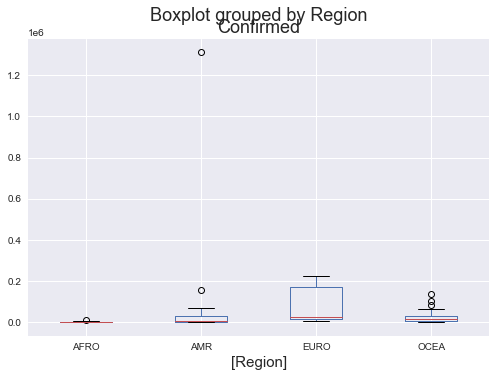

In [57]:
df.boxplot(column=['Confirmed'], by=['Region'])

Raw data does not give a precise and clear picture of data distribution in the quartiles and makes it difficult to interpret accurately. Our raw data is positively skewed. So, we decided to perform the log-transformation on data to reduces the outlier effects and bring the data close to the gaussian distribution.

**Log Transformation: To reduces the outlier data effects**

In [58]:
df['log_confirmed'] = np.log(df['Confirmed'])

<AxesSubplot:title={'center':'log_confirmed'}, xlabel='[Region]'>

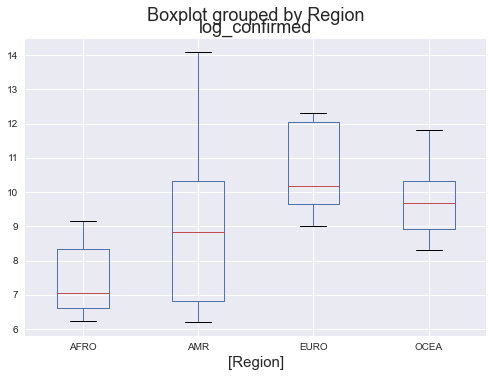

In [59]:
# visualize the transformed data
df.boxplot(column=['log_confirmed'], by=['Region'])

Now, we can observe that data is not normally distributed since there is a clear difference in the spreads around the median. Further, we can perform a statistical test for normality to make a robust conclusion about the log-transformed data. 

**Normality Test: Shapiro-Wilk test**

It tests the null hypothesis that the data was drawn from a normal distribution.

In [77]:
def shapiro_test(data:pd.DataFrame, group:str, dep_var:int):
    """Shapiro test on dependent variable of each group."""
    res = []
    
    for group_name in df[group].unique():
        group_data = df.loc[df[group]==group_name, dep_var]
        statistic, pvalue = stats.shapiro(group_data)
        res.append([group_name, statistic, pvalue])
    
    return pd.DataFrame(res, columns=[group,'statistic','pvalue'])

In [61]:
shapiro_test(df, 'Region', 'log_confirmed')

,Region,statistic,pvalue
0,AFRO,0.891405,0.028542
1,AMR,0.926439,0.131854
2,EURO,0.861001,0.008195
3,OCEA,0.947067,0.324755


Note: data is not normally distributed for regions AFRO and EURO since we reject the null hypothesis at a significant level alpha=0.05 as per the Shapiro-Wilk test.

Since our sample size is small 20 observations from each group. In this scenario, it is highly recommended to do residual analysis [ref. page_417](https://www.amazon.com/Introduction-Statistical-Analysis-Available-Enhanced/dp/0495017582). So, we estimate the linear model on log_confirmed ~ Region and test the normality conditions on residuals.

**Residuals Analysis**

In [62]:
model = ols('log_confirmed ~ C(Region)', df).fit()

In [63]:
model.summary(title="OLS Regression model: log_confirmed~Region")

<class 'statsmodels.iolib.summary.Summary'>
"""
                  OLS Regression model: log_confirmed~Region                  
==============================================================================
Dep. Variable:          log_confirmed   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           6.40e-09
Time:                        23:48:38   Log-Likelihood:                -139.96
No. Observations:                  80   AIC:                             287.9
Df Residuals:                      76   BIC:                             297.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.4230      0.319     23.250      0.000       6.787       8.059
C(Region)[T.AMR]      1.4558      0.452      3.224      0.002       0.557       2.355
C(Region)[T.EURO]     3.1531      0.452      6.983      0.000       2.254       4.052
C(Region)[T.OCEA]     2.3708      0.452      5.251      0.000       1.472       3.270
==============================================================================
Omnibus:                       10.002   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.238
Skew:                           0.709   Prob(JB):                      0.00598
Kurtosis:                       4.029   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# significance of overall model
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p_value = {model.f_pvalue: .4f}")

Overall model F( 3, 76) =  17.995, p_value =  0.0000


We can see that our model is significant at alpha=0.01

**Residuals vs Fitted plot**

If there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted.

Text(0, 0.5, 'Residuals')

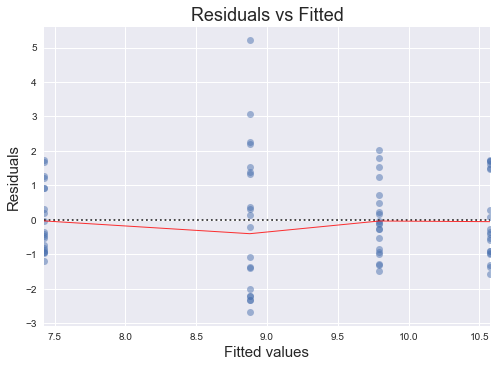

In [66]:
# Residuals vs Fitted plot
ax = sns.residplot(x=model.fittedvalues, 
                   y=model.resid,
                   lowess=True,
                   scatter_kws={'alpha': 0.5},
                   line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

Note: The residuals in the plot are evenly distributed in the lower
and upper boundaries revealing normality condition. We will further prove the normality of residuals using Normal QQ-Plot, Normal PP-Plot and histogram.

**Normality Test on residuals: Normal Q-Q Plot**

In [69]:
def normality_plot(data, fig):
    """plot QQ-plot and PP-plot to observe the normality in data
    
    Note: the normal P-P plot is better at finding deviations from normality in the center 
    of the distribution, and the normal Q-Q plot is better at finding deviations in the tails.  
    Q-Q plots tend to be preferred in research situations. 
    """
    PP = ProbPlot(data)

    ax1 = fig.add_subplot(1,2,1)
    PP.qqplot(line='45', alpha=0.1, lw=1, ax=ax1)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Theoretical Quantiles')
    ax1.set_ylabel('Standardized Residuals')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Normal P-P')
    PP.ppplot(line='45', alpha=0.1, lw=1, ax=ax2)

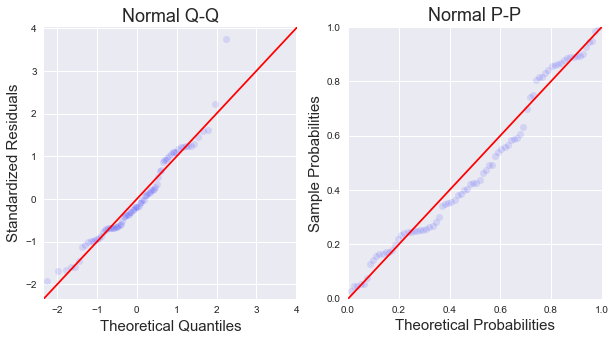

In [70]:
model_norm_residuals = model.get_influence().resid_studentized_internal
normality_plot(model_norm_residuals, plt.figure(figsize=(10,5)))

Note: All of the residuals lying on or close to the red line in both plots so we conclude that residuals is approximately normally distributed.

**Normality Test on residuals: Histogram**

<AxesSubplot:ylabel='Count'>

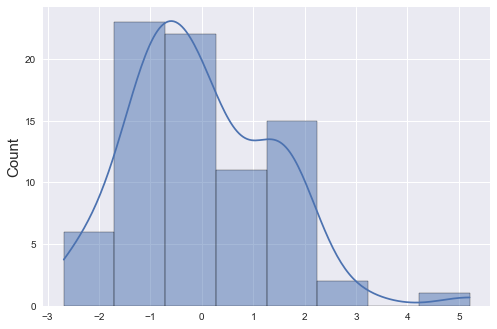

In [71]:
sns.histplot(data=model.resid, kde=True)

**ANOVA Table**

In [72]:
anova_table = sm.stats.anova_lm(model, typ= 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),3.0,110.060500,36.686833,17.994961,6.403435e-09
Residual,76.0,154.943341,2.038728,NaN,NaN


Note: Difference in number of cases among the regions is significant at alpha=0.05 so, we reject the null hypothesis in favour of alternative. However, we don’t know where the difference between regions is yet. So, we will do Post Hoc test to investigate further where the difference lies.

**Post Hoc Test: Tukey HSD**

We will examine where differences in the number of cases among the regions lies using the Tukey HSD test.

In [73]:
mc = MultiComparison(df['log_confirmed'],df['Region'])
results = mc.tukeyhsd()
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  AFRO    AMR   1.4558 0.0099  0.2697 2.6419   True
  AFRO   EURO   3.1531  0.001   1.967 4.3392   True
  AFRO   OCEA   2.3708  0.001  1.1847 3.5569   True
   AMR   EURO   1.6973 0.0019  0.5112 2.8834   True
   AMR   OCEA    0.915 0.1874 -0.2711 2.1011  False
  EURO   OCEA  -0.7823 0.3143 -1.9684 0.4038  False
---------------------------------------------------


Note: The mean COVID-19 cases for AFRO region is statistically different from other regions AMR, EURO, and OCEA at 0.05% significance level. Also, mean COVID-19 cases for AMR-EURO regions is statistically different at 0.05% significance level. At 95% confidence level both AMR-OCEA and EURO-OCEA pair of regions are not significantly different.

In [74]:
def plot_pairwise_confint(confint, meandiffs, pairs):
    """plot pairwise confidence internval for the groups"""
    for lower, upper, mean, pair in zip(confint[:,0],
                                        confint[:,1], 
                                        meandiffs,
                                        pairs):
        plt.hlines(pair, lower, upper)
        plt.plot(mean, pair, "-o")
    plt.axvline(x=0, color = 'r', linestyle = 'dashed', label = "red line")     

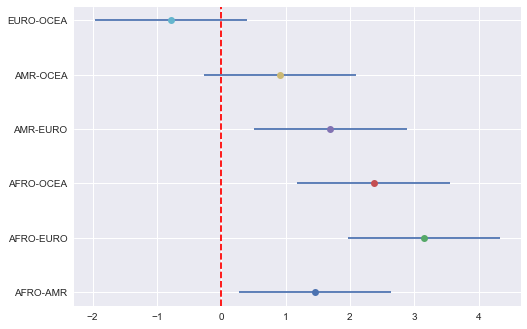

In [75]:
lst = np.unique(mc.groups)
labels = [str(g1+'-'+g2) for i,g1 in enumerate(lst) for j,g2 in enumerate(lst) if i<j ]

plot_pairwise_confint(results.confint, results.meandiffs, labels)

# Conclusion
<br>
<div style='text-align:justify'>
    Statistical analysis has been conducted to establish the statistical significance of COVID-19 cases across the different regions. Raw data was not normally distributed. So, we decided to apply log transformation to reduce the outlier effect. Further, we did residual analysis using linear model confirmed_cases~Region, residuals normality has been tested. Then, we analyze the ANOVA result and observed that there is a statistically significant difference in means of COVID-19 cases across the different regions. For further investigation where the difference exists, we used the Tukey HSD test and observed that the mean of COVID-19 cases for the AFRO region is statistically different from other regions AMR, EURO, and OCEA at 0.05% significance level. It might be because of low testing capacity resulting from few testing equipment in Africa. Also, mean COVID-19 cases for AMR-EURO regions are statistically different at a 0.05% significance level. At 95% confidence level both AMR-OCEA and EURO-OCEA pair of regions are not significantly different.
</div>
